In [1]:
# importing basic libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset 

book = pd.read_csv("Dataset/Books.csv")
rating = pd.read_csv("Dataset/Ratings.csv")
user = pd.read_csv("Dataset/Users.csv")

print(f'Dataset Shape : \nBook - {book.shape}\nRating - {rating.shape}\nUser - {user.shape}')


Dataset Shape : 
Book - (271360, 8)
Rating - (1149780, 3)
User - (278858, 3)


Exploring Dataset one by one 

Book Dataset

In [3]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Droping URL col as it is not req for analysis

book.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace= True)
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [5]:
book.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [6]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [7]:
book.loc[book['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [8]:
book.loc[book['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [9]:
book.at[209538 ,'Publisher'] = 'DK Publishing Inc'
book.at[209538 ,'Year-Of-Publication'] = 2000
book.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
book.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

book.at[221678 ,'Publisher'] = 'DK Publishing Inc'
book.at[221678 ,'Year-Of-Publication'] = 2000
book.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
book.at[209538 ,'Book-Author'] = 'James Buckley'

book.at[220731 ,'Publisher'] = 'Gallimard'
book.at[220731 ,'Year-Of-Publication'] = '2003'
book.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
book.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [10]:
# Changing the year type to int 
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype(int)

In [11]:
print(sorted(list(book['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [12]:
## Replacing Invalid years with max year
from collections import Counter


count = Counter(book['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [13]:
book.loc[book['Year-Of-Publication'] > 2023, 'Year-Of-Publication'] = 2002
book.loc[book['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [14]:
# Uppercasing all the letter in ISBN
book["ISBN"] = book["ISBN"].str.upper()

In [15]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [16]:
book.loc[book['Book-Author'].isnull(), : ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [17]:
book.loc[book['Publisher'].isnull(), :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [18]:
book.at[187689 ,'Book-Author'] = 'Other'

book.at[128890 ,'Publisher'] = 'Other'
book.at[129037 ,'Publisher'] = 'Other'

In [19]:
book.duplicated().sum()

313

In [20]:
book.drop_duplicates(keep='last', inplace=True)
book.reset_index(drop=True, inplace=True)

In [21]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271047 non-null  object
 1   Book-Title           271047 non-null  object
 2   Book-Author          271047 non-null  object
 3   Year-Of-Publication  271047 non-null  int64 
 4   Publisher            271047 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


User Dataset

In [22]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [24]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [25]:
# Checking all values in Age 
print(sorted(list(user['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [26]:
req = user[user['Age'] <= 80]
req = req[req['Age'] >= 10]

mean = round(req['Age'].mean())
mean

35

In [27]:
# Chaning users greator than 80 to mean 
user.loc[user['Age'] > 80, 'Age'] = mean

# Chaning users less than 10 to mean 
user.loc[user['Age'] < 10, 'Age'] = mean

# Chaning null values to mean 
user['Age'] = user['Age'].fillna(mean)

# Chaning the type to int 
user['Age'] = user["Age"].astype(int)


In [28]:
list_ = user.Location.str.split(', ')

city = []
state = []
country = []

count_no_state = 0
count_no_country = 0

for i in range(0, len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0] == 'n/a' or list_[i][0] == ',':
        city.append('Other')
    else:
        city.append(list_[i][0].lower())
        
    if len(list_[i]) < 2:
        state.append('Other')
        country.append('Other')
        count_no_state += 1
        count_no_country += 1
        
    else:
        if list_[i][1] == '' or list_[i][1] == ' ' or list_[i][1] == 'n/a' or list_[i][1] == ',':
            state.append('Other')
            count_no_state += 1
        else:
            state.append(list_[i][1].lower())  
            
        if len(list_[i]) < 3:
            country.append('Other')
            count_no_country += 1
        
        else:
            if list_[i][2] == '' or list_[i][2] == ' ' or list_[i][2] == 'n/a' or list_[i][2] == ',':
                country.append('Other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())  

user = user.drop('Location', axis = 1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

user = pd.concat([user, df_city], axis=1)
user = pd.concat([user, df_state], axis=1)
user = pd.concat([user, df_country], axis=1)

In [29]:
print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4666
16044


In [30]:
## Drop duplicate rows
user.drop_duplicates(keep='last', inplace=True)
user.reset_index(drop=True, inplace=True)

In [31]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int64 
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.6+ MB


In [32]:
user.head()

,User-ID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


Ratings Dataset

In [33]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [34]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [35]:
## removing extra characters from ISBN (from ratings dataset) existing in books dataset
import re


bookISBN = book['ISBN'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in rating.iterrows():
    z = re.search(reg, row_Value['ISBN'])    
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in bookISBN:
            rating.at[index , 'ISBN'] = f
            
## Uppercasing all alphabets in ISBN
rating['ISBN'] = rating['ISBN'].str.upper()

In [36]:
rating.duplicated().sum()

4

Merging all three tables

In [37]:
data = pd.merge(user, rating, on='User-ID', how= 'inner')
data.head()

,User-ID,Age,City,State,Country,ISBN,Book-Rating
0,2,18,stockton,california,usa,0195153448,0
1,7,35,washington,dc,usa,034542252,0
2,8,35,timmins,ontario,canada,0002005018,5
3,8,35,timmins,ontario,canada,0060973129,0
4,8,35,timmins,ontario,canada,0374157065,0


In [38]:
data = pd.merge(book, data, on='ISBN',how='inner')
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,City,State,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,18,stockton,california,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,35,timmins,ontario,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,49,ottawa,ontario,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,35,Other,Other,Other,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,35,sudbury,ontario,canada,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031613 entries, 0 to 1031612
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031613 non-null  object
 1   Book-Title           1031613 non-null  object
 2   Book-Author          1031613 non-null  object
 3   Year-Of-Publication  1031613 non-null  int64 
 4   Publisher            1031613 non-null  object
 5   User-ID              1031613 non-null  int64 
 6   Age                  1031613 non-null  int64 
 7   City                 1031613 non-null  object
 8   State                1031613 non-null  object
 9   Country              1031613 non-null  object
 10  Book-Rating          1031613 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 94.4+ MB


In [40]:
## Explicit Ratings Dataset
data_e = data[data['Book-Rating'] != 0]
data_e = data_e.reset_index(drop = True)
data_e.shape

(384076, 11)

In [41]:
## Implicit Ratings Dataset
data_i = data[data['Book-Rating'] == 0]
data_i = data_i.reset_index(drop = True)
data_i.shape

(647537, 11)

In [42]:
data_e.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,City,State,Country,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,35,timmins,ontario,canada,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,35,Other,Other,Other,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,30,toronto,ontario,canada,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,35,ottawa,Other,Other,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,35,kingston,ontario,canada,9


DATA VISUALIZATION

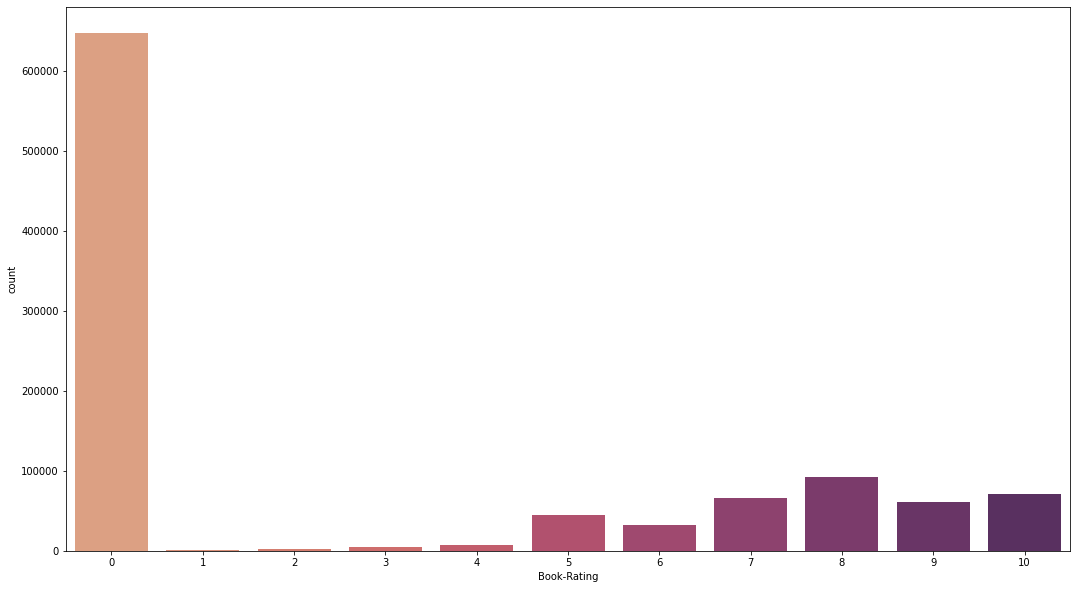

In [43]:
# Count vs Book Rating 
plt.figure(figsize=(18,10))
sns.countplot(data = data, x = 'Book-Rating', palette="flare")
plt.show()

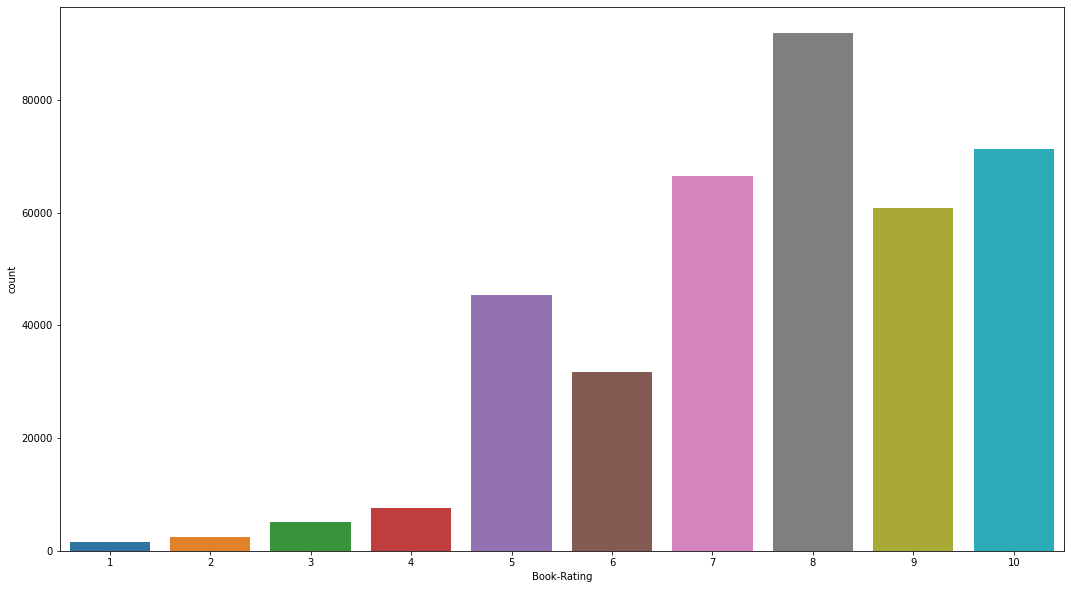

In [44]:
# Count vs Explicit Book Rating 
plt.figure(figsize=(18,10))
sns.countplot(data = data_e, x = 'Book-Rating')
plt.show()

Text(0.5, 1.0, 'No of books by an author (Top 15)')

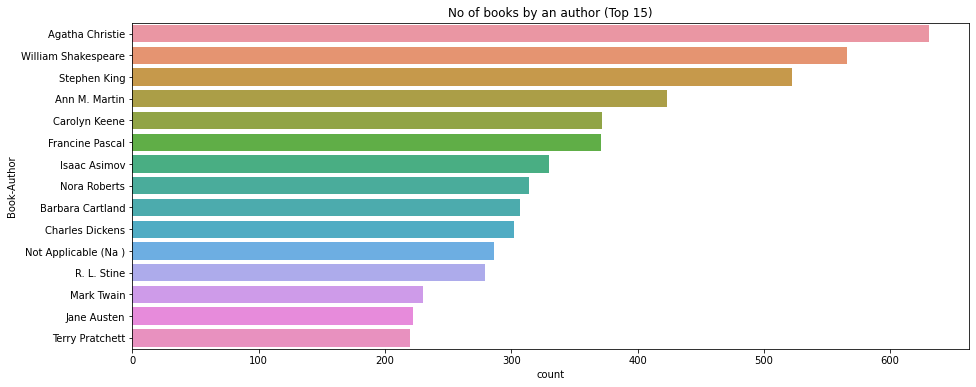

In [45]:
# No. of Book by an Author
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=book,order=book['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

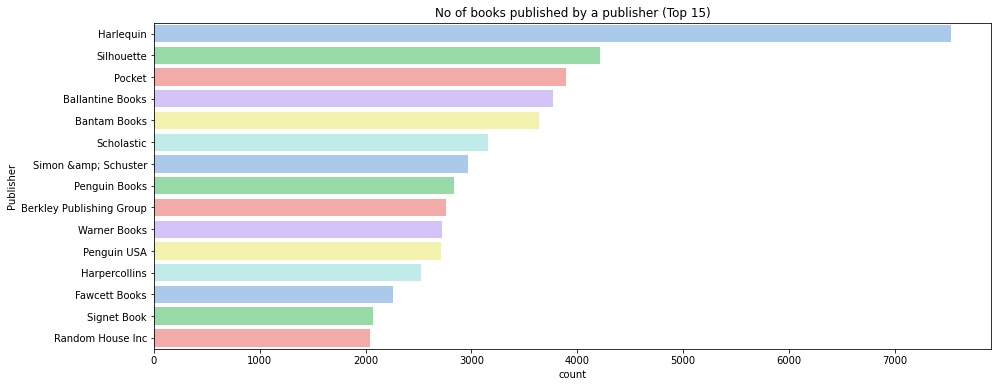

In [46]:
# No. of book by Publisher 

plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=book,order=book['Publisher'].value_counts().index[0:15], palette="pastel6")
plt.title("No of books published by a publisher (Top 15)")

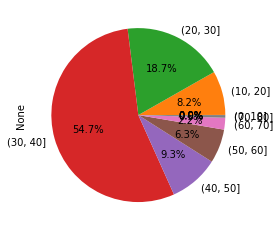

In [47]:
# Pie chart of distribution of users by age range

age_groups = user.groupby(pd.cut(user['Age'], np.arange(0, 110, 10))).size()
age_groups.plot.pie(autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'No of readers from each city (Top 15)')

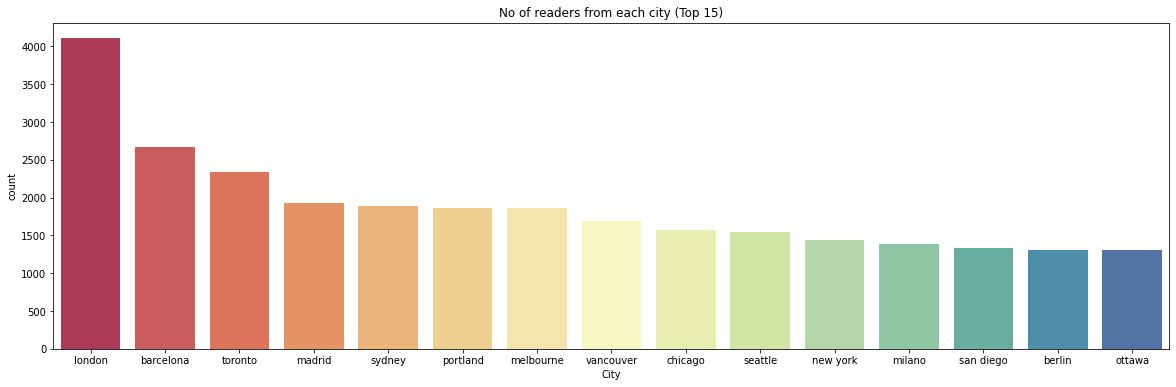

In [48]:
# No. of readers from each city 

plt.figure(figsize=(20,6))
sns.countplot(x="City", data=user,order=user['City'].value_counts().index[0:15], palette="Spectral")             
plt.title("No of readers from each city (Top 15)")

Text(0.5, 1.0, 'No of readers from each state (Top 15)')

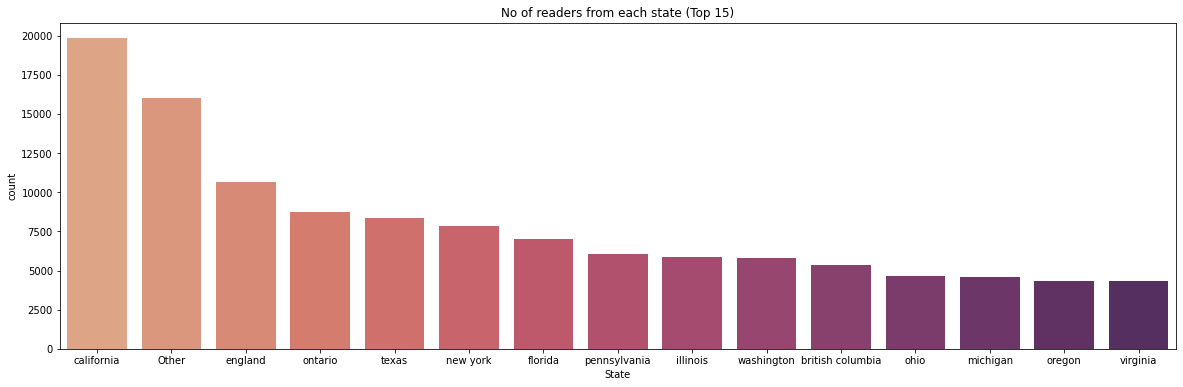

In [49]:
# No. of readers from each state 

plt.figure(figsize=(20,6))
sns.countplot(x="State", data=user,order=user['State'].value_counts().index[0:15], palette="flare")
plt.title("No of readers from each state (Top 15)")

Text(0.5, 1.0, 'No of readers from each country (Top 15)')

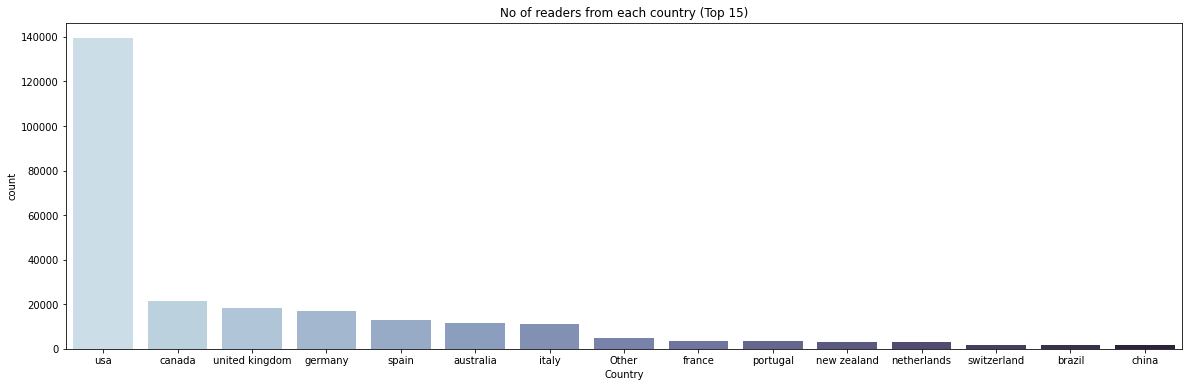

In [50]:
# No. of readers from each country 

plt.figure(figsize=(20,6))
sns.countplot(x="Country", data=user,order=user['Country'].value_counts().index[0:15], palette="ch:s=.25,rot=-.25")
plt.title("No of readers from each country (Top 15)")

Text(0.5, 1.0, 'Number of Ratings for a book (Top 15)')

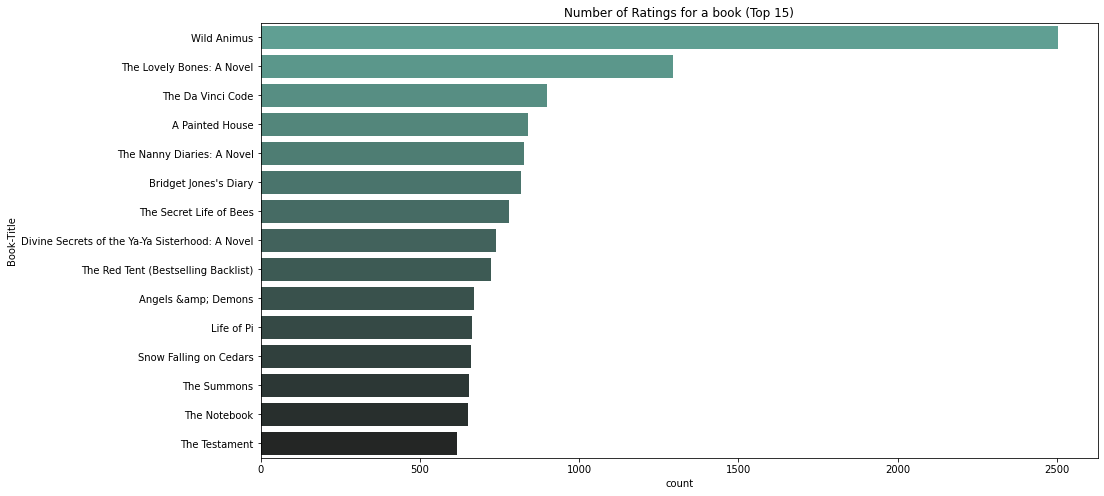

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=data, order=data['Book-Title'].value_counts().index[0:15], palette="dark:#5A9_r")
plt.title("Number of Ratings for a book (Top 15)")

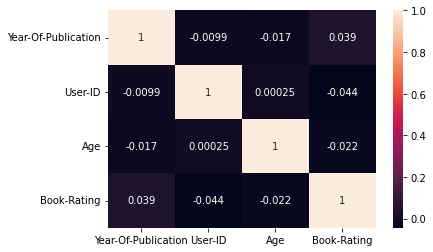

In [52]:
#Heatmap of Corr matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

RECOMMENDAR SYSTEM

Popularity Based 

In [53]:
def popularity(df):
    dt = pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending = False).head(10)
    return pd.merge(dt, book, on='ISBN')

print(f'Top books - \n{popularity(data_e)}')


Top books - 
         ISBN  Book-Rating                                         Book-Title  \
0  0316666343          707                          The Lovely Bones: A Novel   
1  0971880107          581                                        Wild Animus   
2  0385504209          488                                  The Da Vinci Code   
3  0312195516          383                The Red Tent (Bestselling Backlist)   
4  0060928336          320    Divine Secrets of the Ya-Ya Sisterhood: A Novel   
5  059035342X          315  Harry Potter and the Sorcerer's Stone (Harry P...   
6  0142001740          314                            The Secret Life of Bees   
7  0446672211          295  Where the Heart Is (Oprah's Book Club (Paperba...   
8  044023722X          282                                    A Painted House   
9  0452282152          278                          Girl with a Pearl Earring   

       Book-Author  Year-Of-Publication                Publisher  
0     Alice Sebold          

In [54]:
# Top books based on region

def popularity_place(dataframe, region):
    region = region.lower()

    if region in list(dataframe['City'].unique()):
        return popularity(dataframe[dataframe['City'] == region]).head(10)
    elif region in list(dataframe['State'].unique()):
        return popularity(dataframe[dataframe['State'] == region]).head(10)
    elif region in list(dataframe['Country'].unique()):
        return popularity(dataframe[dataframe['Country'] == region]).head(10)
    else:
        return "Invalid Entry"
    

region = input("Enter region - ")
print(f'Top Books in {region.capitalize()} are -- \n')
popularity_place(data_e, region)
# search_unique_places(data, 'Mumbai')

Top Books in India are -- 



,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0971880107,3,Wild Animus,Rich Shapero,2004,Too Far
1,0671047612,2,Skin And Bones,Franklin W. Dixon,2000,Aladdin
2,0486284735,2,Pride and Prejudice (Dover Thrift Editions),Jane Austen,1995,Dover Publications
3,8171670407,2,Inscrutable Americans,Mathur Anurag,1996,South Asia Books
4,0006944035,1,Secret Island / Secret Mountain (Two-in-ones),Enid Blyton,1994,HarperCollins Publishers
5,067189109X,1,The Blessing,Jude Deveraux,1999,Pocket Star
6,0671711172,1,Seven Habits of Highly Effective People,Stephen R. Covey,1992,Simon &amp; Schuster (Trade Division)
7,0671679414,1,Memoirs of a Mangy Lover,Groucho Marx,1989,Simon &amp; Schuster
8,0671657518,1,HT STOP WORRYING R,Dale Carnegie,1987,Pocket
9,0671505173,1,CROSS COUNTRY CRIME (HARDY BOYS 134) : CROSS C...,Franklin W. Dixon,1995,Aladdin


In [55]:
# Books popular Yearly
dt = pd.DataFrame(data_e.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False)
dt = pd.merge(dt, book, on='ISBN')

years = set()
indices = []
for ind, row in dt.iterrows():
    if row['Year-Of-Publication'] in years:
        indices.append(ind)
    else:
        years.add(row['Year-Of-Publication'])

dt = dt.drop(indices)
dt = dt.drop('Book-Rating', axis = 1)
dt = dt.sort_values('Year-Of-Publication')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [56]:
dt.reset_index()

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,73895,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz
1,73896,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus
2,130309,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp
3,81469,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co
4,125519,0671397214,JOY OF MUSIC P,Leonard Bernstein,1901,Fireside
5,48634,0373226888,Tommy's Mom,Linda O. Johnston,1902,Harlequin
6,104339,038528120X,CATCH 22,JOSEPH HELLER,1904,Delta
7,103193,0404089119,Charlotte Bronte and Her Sisters,Clement K. Shorter,1906,Ams Pr
8,24666,0911662251,Kybalion: A Study of the Hermetic Philosophy o...,Three Initiates,1908,Yoga Publication Society
9,53807,0892760508,New Birth,Kenneth Hagin,1911,Faith Library Publications


In [57]:
def get_book_title(df, year):
    if year in df['Year-Of-Publication'].values:
        year_df = df[df['Year-Of-Publication'] == year]
        return year_df.iloc[0]['Book-Title'], year_df.iloc[0]['Book-Author']
    else : 
        return "Invalid Year"
    
yr = int(input("Enter year : "))
print(f'Best book of {yr} is {get_book_title(dt, yr)[0]} by {get_book_title(dt, yr)[1]}.')

Best book of 2021 is Heidi by Johanna Spyri.


Collaborative Based (User-Item) 

Selecting books with total ratings equals to or more than 50 (Because of availability of limited resources)


In [58]:
df = pd.DataFrame(data_e['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = data_e.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [59]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['Book-Rating'] = popular_book['Book-Rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','Book-Rating']].groupby(testdf['ISBN'])

In [60]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity


listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [61]:
def printBookDetails(bookID):
    print(data_e[data_e['ISBN']==bookID]['Book-Title'].values[0])

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if data_e[data_e['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn >= 6:
                      break
                mn+=1
                similar.append(data_e[data_e['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(data_e[data_e['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative

In [64]:
bookName = input("Enter Book Name : ")
k = list(data_e['Book-Title'])
m = list(data_e['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Wild Animus

RECOMMENDATIONS:

Chicken Soup for the Teenage Soul (Chicken Soup for the Soul)
The Andromeda Strain
Q Is for Quarry
Cause of Death
Beloved
Quentins


Content Based

In [65]:
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(44652, 6)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(44652, 1112)

In [67]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(44652, 44652)

In [68]:
print("Recommended Books:\n")
isbn = book.loc[book['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < 6:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Into the Wild
A Prayer for Owen Meany
Jewel
A Lesson Before Dying (Vintage Contemporaries (Paperback))
The Subtle Knife (His Dark Materials, Book 2)
The Two Towers (The Lord of the Rings, Part 2)


HyBrid Approach (collaborative + content)

In [69]:
import operator


z = list()
k = float(1/6)
for x in range(6):
      z.append(1-k*x)

dictISBN = {}
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]

ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w=0
print("Input Book:\n")
print(bookName)
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w>=6:
        break
    w+=1
    print(x)

Input Book:

Wild Animus

Recommended Books:

Chicken Soup for the Teenage Soul (Chicken Soup for the Soul)
Into the Wild
The Andromeda Strain
A Prayer for Owen Meany
Q Is for Quarry
Jewel
